# Homework 1 notes

We download the file directly from the website using a custom function.  In the homework, you
were asked to create a directory (folder) for the homework, with subdirectories (subfolders)
for `data` and `analysis`.

In the code below, we are reading in the file directly, and the temporary file created here
will be deleted by the operating system.  When reading in the data file from a directory (folder),
**you must use relative paths** and never use absolute paths.

In [1]:
# function to download a dryad data file given the fileid number and download filename
dryadFileDownload <- function(filenum,filename,baseurl="https://datadryad.org/api/v2")
{
    download.file(paste(baseurl,"/files/",filenum,"/download",sep=""),filename,mode="wb")
}
## make a temporaty filename with csv extension
tmpfile <- tempfile(fileext="csv")
## download that file
dryadFileDownload("2545788",tmpfile)
## read in the file
uric <- read.csv(tmpfile)
# examine first few lines
head(uric)

ID sex Age BMI   SBP DBP FBG  TC   Cr GFR     UA  Times hypertension
1 1  2   79  24.35 132 83  6.20 4.65 54 116.182 284 1     1           
2 1  2   81  25.24 136 85  6.09 4.97 95  57.605 208 2     1           
3 1  2   83  23.43 120 86  6.16 4.92 66  89.899 230 3     1           
4 1  2   85  24.70 144 80  6.24 5.15 50 126.093 199 4     2           
5 2  2   63  27.27 120 73  5.37 4.08 63 100.027 247 1     1           
6 2  2   65  25.92 120 74  5.25 4.74 74  81.554 326 2     1           
  hyperglycemia dyslipidemia
1 1             1           
2 1             1           
3 1             1           
4 1             1           
5 1             1           
6 1             1

In [2]:
nrow(uric)

[1] 25744

We make a histogram of the systolic blood pressure. There are over 25K data points.

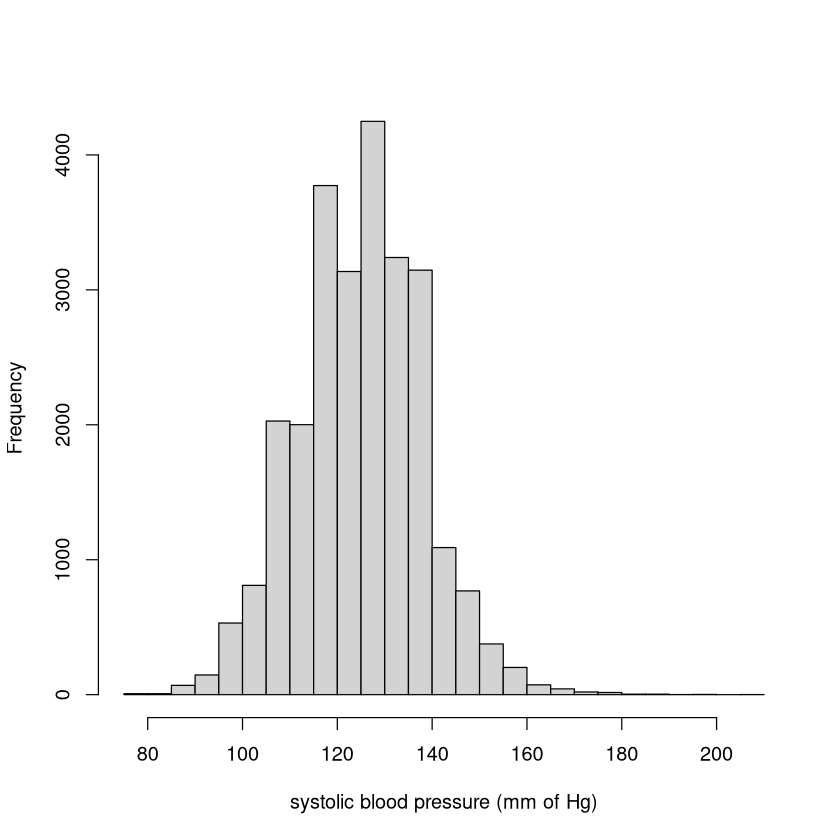

In [3]:
hist(uric$SBP,nclass=20,main="",xlab="systolic blood pressure (mm of Hg)")

Making a scatterplot of the systolic and diastolic blood pressure. We do not see the
detail in the middle of the plot, because a lot of points fall in the same place. A
binning strategy is better (as with a histogram vs a dotplot).

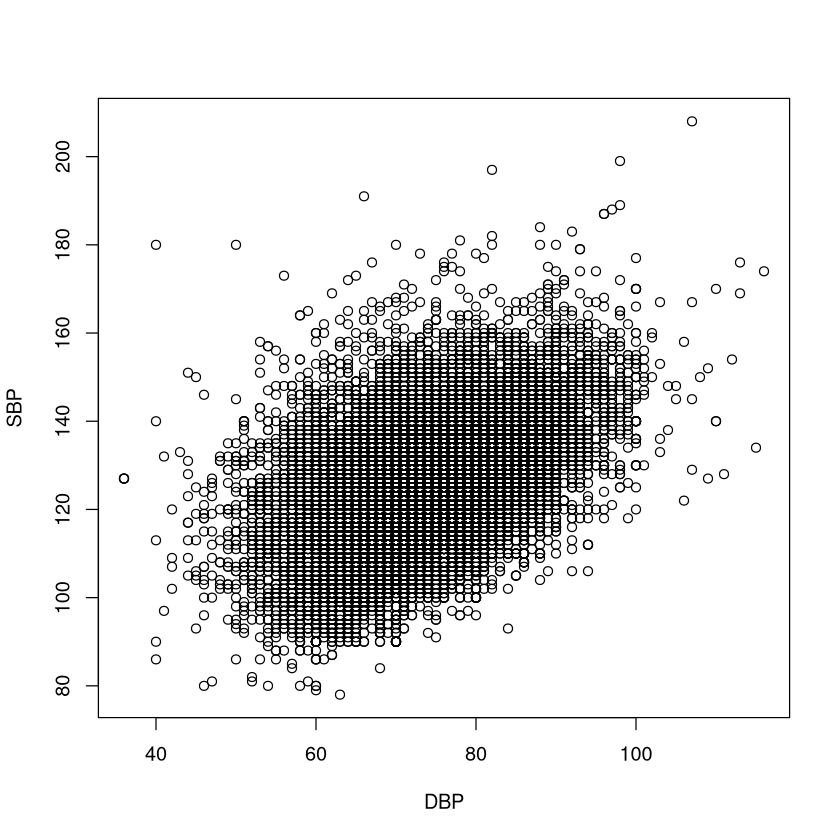

In [4]:
plot(uric$DBP,uric$SBP,xlab="DBP",ylab="SBP")

In [5]:
# load hexbin package
library(hexbin)

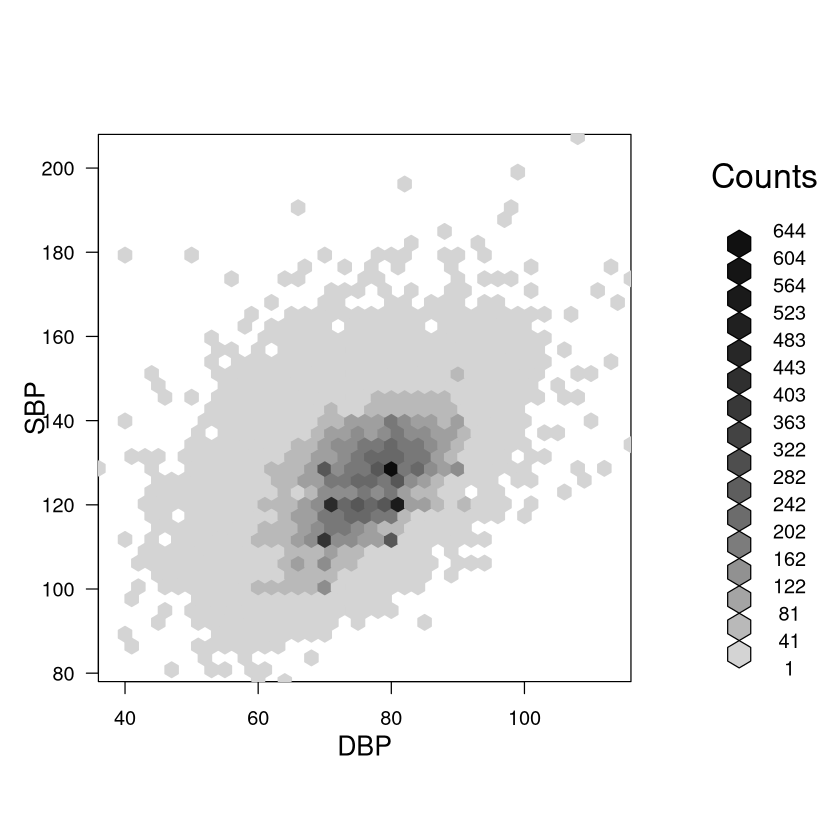

In [6]:
gplot.hexbin(hexbin(uric$DBP,uric$SBP,xbins = 40),xlab="DBP",ylab="SBP")

The hexbin plot is better, but it still suffers from the issue that there are a lot of points in the middle, and the detail is not showing.  We use the square root of the counts to make the hexbin plot.

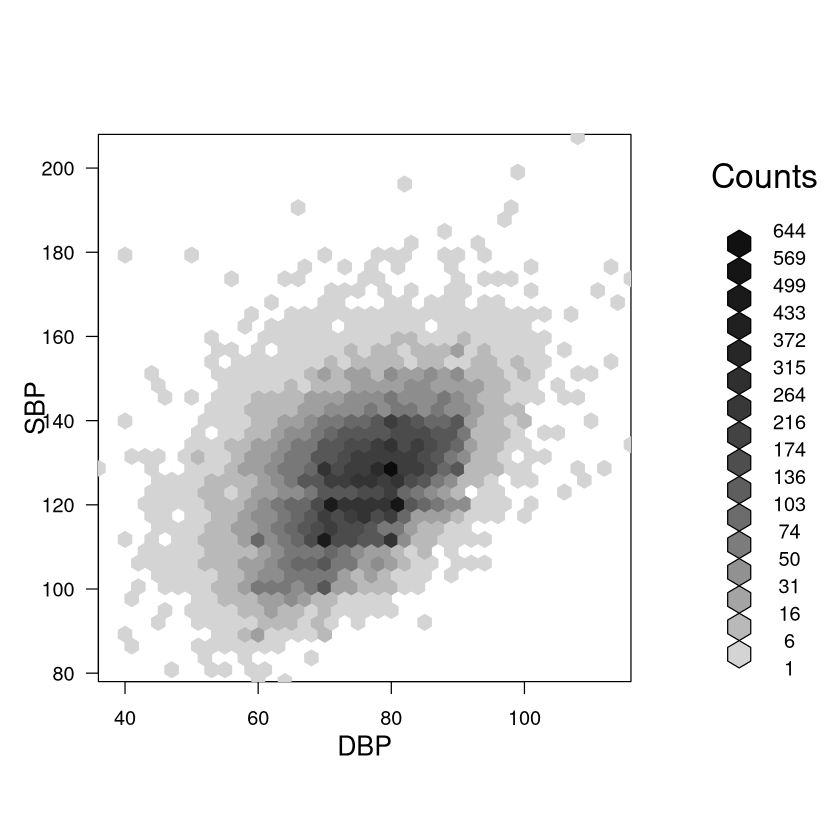

In [7]:
hexbin(uric$DBP,uric$SBP,xbins = 40) |>
    gplot.hexbin(x=_,trans=sqrt,inv=\(x) x^2,xlab="DBP",ylab="SBP")

We now perform linear regression.  Notice that the $R^2$ is about 21%. The residual
standard error is 11.5, which means that the prediction error is approximately plus/minus 23 points.

In [8]:
( out1 <- lm(SBP~DBP+sex,data=uric) ) |> summary()


Call:
lm(formula = SBP ~ DBP + sex, data = uric)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.104  -8.155  -0.391   7.279  78.782 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 74.392595   0.722755  102.93  < 2e-16 ***
DBP          0.690690   0.008391   82.31  < 2e-16 ***
sex         -0.400916   0.155392   -2.58  0.00988 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.58 on 25741 degrees of freedom
Multiple R-squared:  0.2144,	Adjusted R-squared:  0.2144 
F-statistic:  3513 on 2 and 25741 DF,  p-value: < 2.2e-16


We can make a residual vs fitted plot, the usual as well as a hexbinned one.

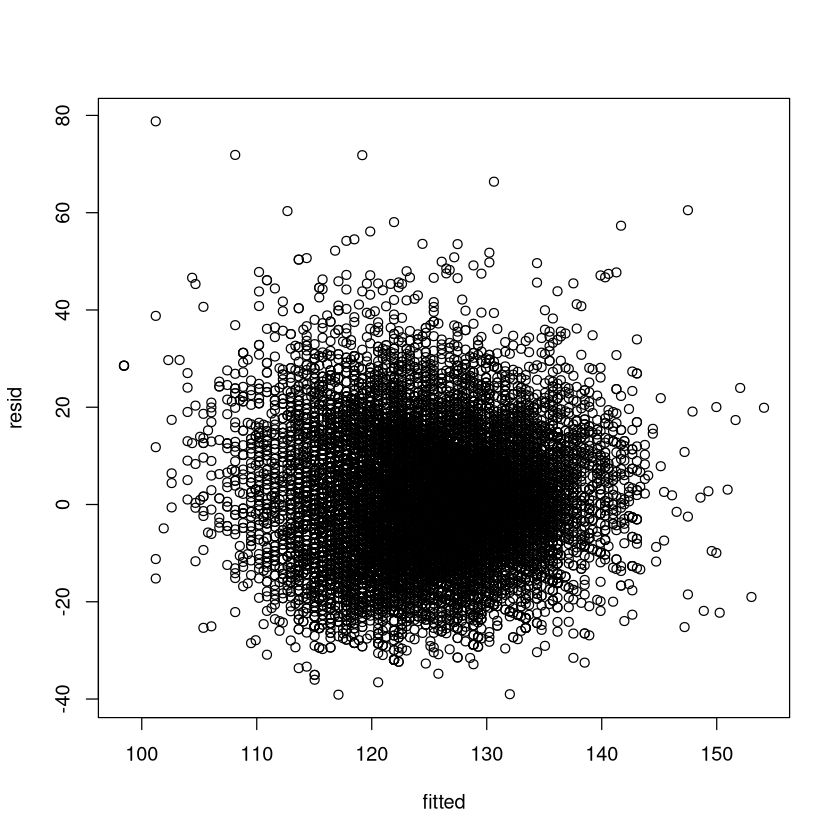

In [9]:
plot(fitted(out1), resid(out1),xlab="fitted",ylab="resid")

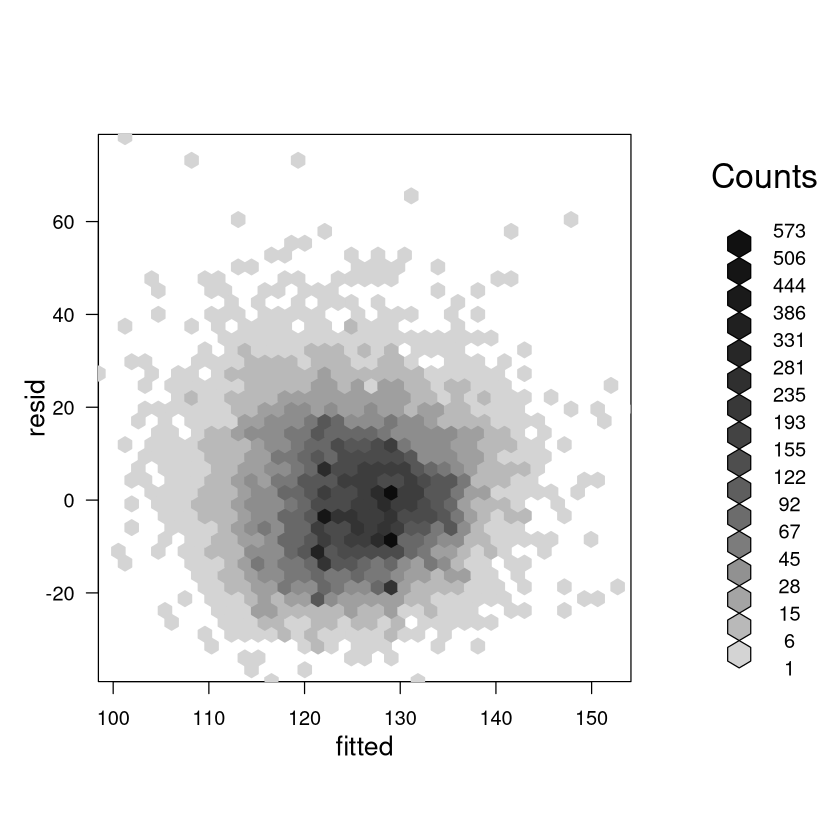

In [10]:
hexbin(x=fitted(out1),y=resid(out1),xbins = 40)  |>
    gplot.hexbin(x=_,trans=sqrt,inv=\(x) x^2,
                ,xlab="fitted",ylab="resid")

We can fit quadratic and cubic terms which improve the fit, but don't decrease
the prediction error.

In [11]:
( out2 <- lm(SBP ~ sex + DBP + I(DBP^2),data=uric) ) |> summary()


Call:
lm(formula = SBP ~ sex + DBP + I(DBP^2), data = uric)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.646  -8.070  -0.385   7.374  71.879 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.291e+02  3.487e+00  37.019  < 2e-16 ***
sex         -4.165e-01  1.546e-01  -2.694  0.00707 ** 
DBP         -7.982e-01  9.327e-02  -8.558  < 2e-16 ***
I(DBP^2)     1.000e-02  6.239e-04  16.028  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.52 on 25740 degrees of freedom
Multiple R-squared:  0.2222,	Adjusted R-squared:  0.2221 
F-statistic:  2451 on 3 and 25740 DF,  p-value: < 2.2e-16


In [12]:
( out3 <- lm(SBP ~ sex + poly(DBP,3),data=uric) ) |> summary()


Call:
lm(formula = SBP ~ sex + poly(DBP, 3), data = uric)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.396  -7.986  -0.393   7.338  72.148 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   126.3224     0.2678 471.633  < 2e-16 ***
sex            -0.4076     0.1546  -2.637  0.00837 ** 
poly(DBP, 3)1 965.3750    11.6666  82.747  < 2e-16 ***
poly(DBP, 3)2 184.6938    11.5185  16.035  < 2e-16 ***
poly(DBP, 3)3 -54.7501    11.5191  -4.753 2.02e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.52 on 25739 degrees of freedom
Multiple R-squared:  0.2229,	Adjusted R-squared:  0.2228 
F-statistic:  1846 on 4 and 25739 DF,  p-value: < 2.2e-16
